In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from google.colab import files


In [4]:
uploaded = files.upload()


Saving observations.csv to observations.csv
Saving species_info.csv to species_info (1).csv


In [5]:
# Get the filenames
filenames = list(uploaded.keys())

# Read the CSV files
df1 = pd.read_csv(filenames[0])
df2 = pd.read_csv(filenames[1])

# Display the DataFrames
print("First CSV file:")
print(df1.head())

print("\nSecond CSV file:")
print(df2.head())


First CSV file:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

Second CSV file:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 Na

In [6]:
#summary statistics
df1.describe()
df2.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [8]:
# Check for missing values
df1.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [9]:
df1.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [10]:
#Merging the two dataframes
# Merge the DataFrames

# df1 = pd.read_csv('path_to_df1.csv')
# df2 = pd.read_csv('path_to_df2.csv')

# Merging the DataFrames on the 'scientific_name' column
merged_df = pd.merge(df1, df2, on='scientific_name', how='inner')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())



Merged DataFrame:
      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


conservation_status
Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: count, dtype: int64


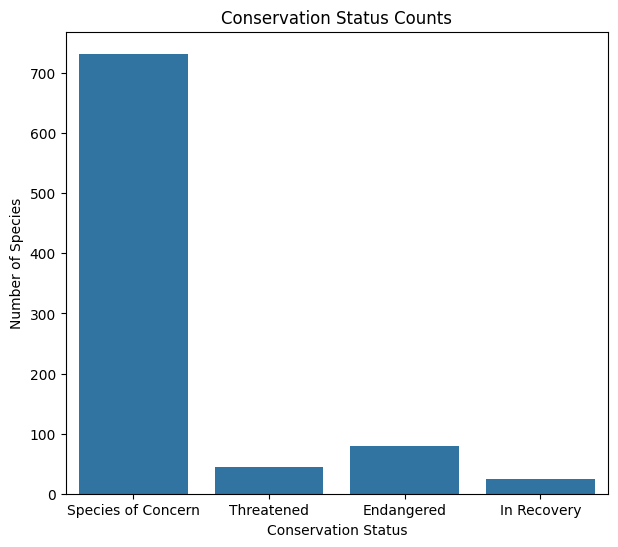

In [11]:
#To investigate the distribution of conservation statuses across different species.
# Count of species by conservation status
conservation_counts = merged_df['conservation_status'].value_counts()
print(conservation_counts)

# Plot the conservation status counts
plt.figure(figsize=(7,6))
sns.countplot(data=merged_df, x='conservation_status')
plt.title('Conservation Status Counts')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()



category
Vascular Plant       19560
Bird                  2364
Nonvascular Plant     1332
Mammal                1200
Fish                   524
Amphibian              328
Reptile                324
Name: count, dtype: int64


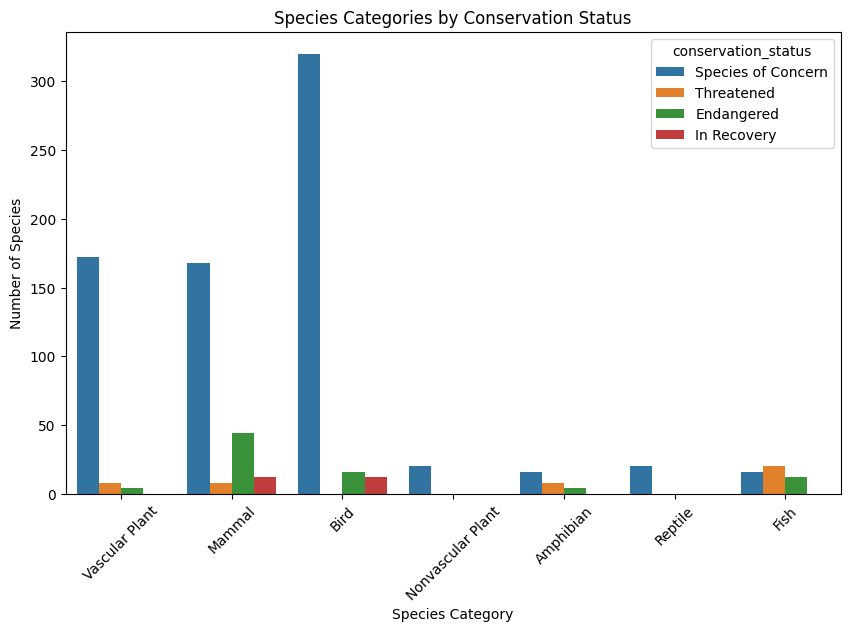

In [12]:
#Now, to investigate the types of species and their conservation statuses in different parks.
# Count of species by category
category_counts = merged_df['category'].value_counts()
print(category_counts)

# Plot the category counts
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='category', hue='conservation_status')
plt.title('Species Categories by Conservation Status')
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


conservation_status                  Endangered  In Recovery  \
park_name                                                      
Bryce National Park                          20            6   
Great Smoky Mountains National Park          20            6   
Yellowstone National Park                    20            6   
Yosemite National Park                       20            6   

conservation_status                  Species of Concern  Threatened  
park_name                                                            
Bryce National Park                                 183          11  
Great Smoky Mountains National Park                 183          11  
Yellowstone National Park                           183          11  
Yosemite National Park                              183          11  


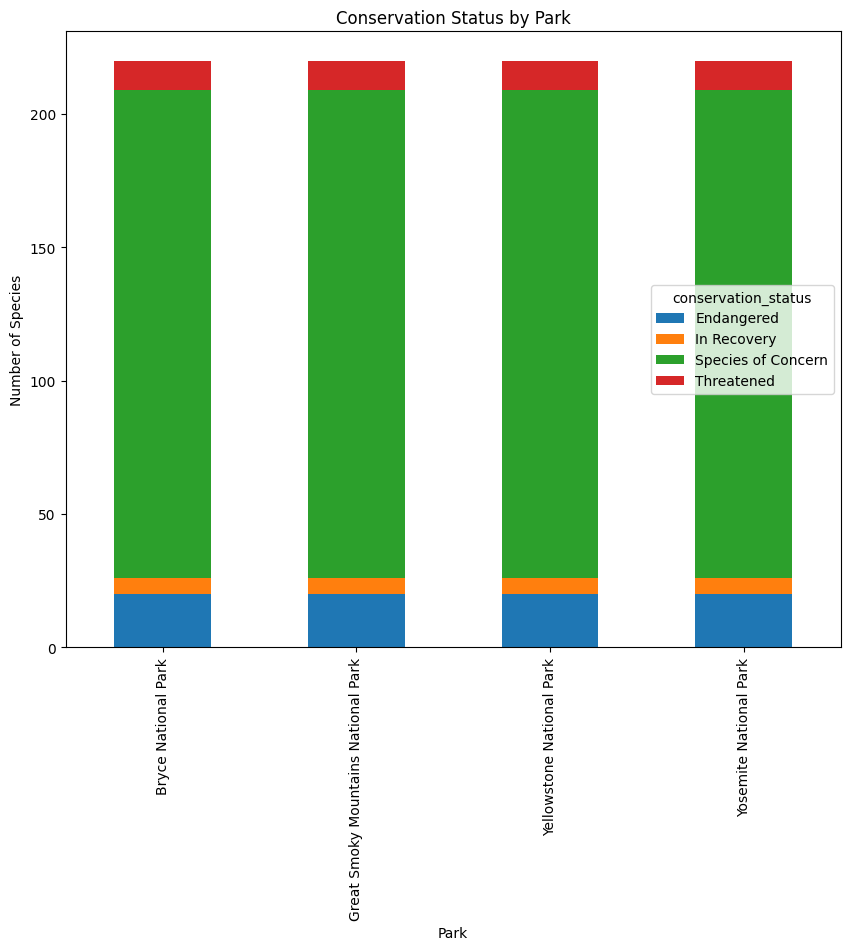

In [22]:
#Finally To analyze the distribution of endangered species across different parks.
# Count of species by park and conservation status
park_conservation = merged_df.groupby(['park_name', 'conservation_status']).size().unstack().fillna(0)
print(park_conservation)

# Plot
park_conservation.plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Conservation Status by Park')
plt.xlabel('Park')
plt.ylabel('Number of Species')
plt.show()


In [23]:


#In this analysis, we delve into the rich biodiversity of our national parks, focusing on the conservation statuses
#of various species and their observations across different parks. By merging datasets containing species information
#and park-specific data, we aim to uncover patterns and insights that can inform conservation efforts and
#raise awareness about the status of our natural heritage.

#Below are some key questions as we explore to bring these insights to light:

#1. **Which parks have the highest number of species observations?**
#2. **Which categories of species have the most observations in the national parks?**
#3. **What is the conservation status distribution of the species observed in the national parks?**
#4. **Are certain categories of species more likely to be endangered?**

#Let's dive into the data and discover the answers!


Top 5 Parks with the Highest Number of Species Observations:
park_name
Yellowstone National Park              1587641
Yosemite National Park                  949452
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Name: observations, dtype: int64


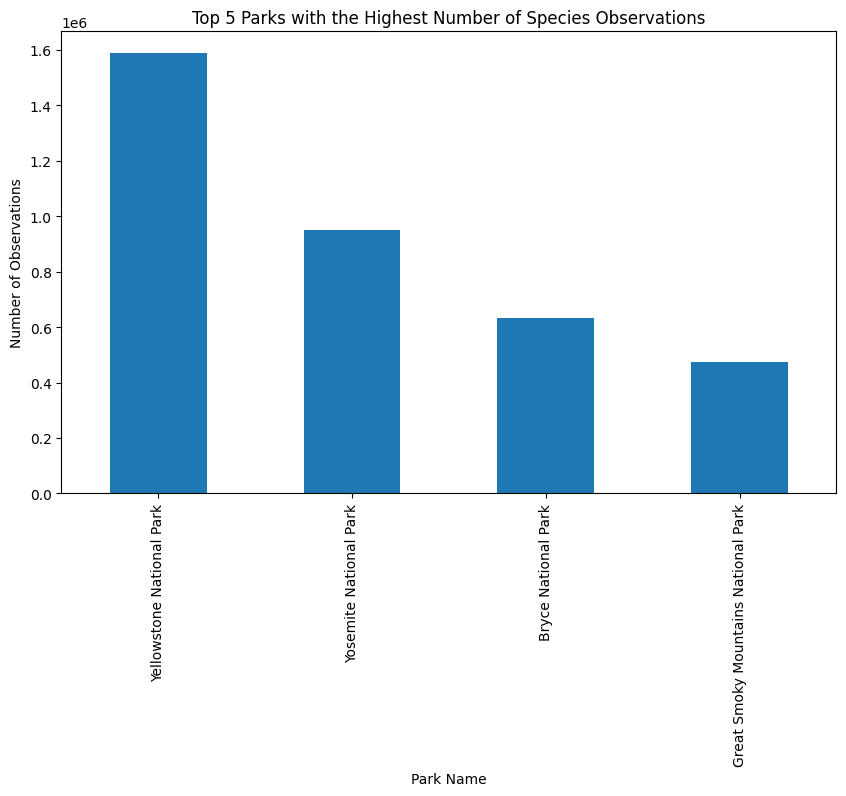

In [13]:
#Park having the highest number of species observations
# Aggregate observations by park_name
park_observations = merged_df.groupby('park_name')['observations'].sum().sort_values(ascending=False)

# Display the top 5 parks with the highest observations
top_parks = park_observations.head(5)
print("Top 5 Parks with the Highest Number of Species Observations:")
print(top_parks)

# Plotting the top 5 parks
plt.figure(figsize=(10, 6))
top_parks.plot(kind='bar')
plt.title('Top 5 Parks with the Highest Number of Species Observations')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.show()


Categories of Species with the Most Observations:
category
Vascular Plant       2795312
Bird                  332371
Nonvascular Plant     190653
Mammal                163120
Fish                   72901
Reptile                45822
Amphibian              45068
Name: observations, dtype: int64


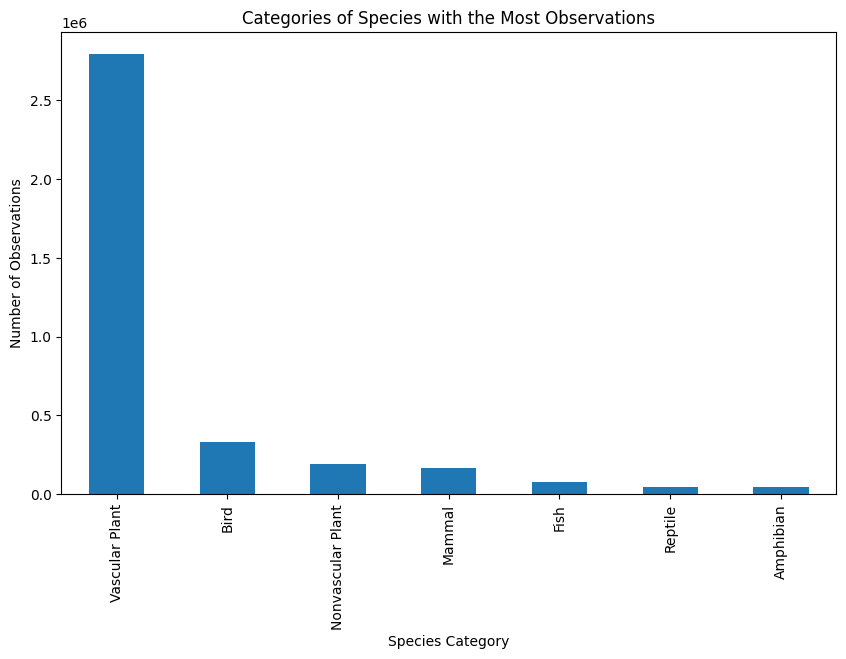

In [14]:
# Categories of species having the most observations in the national parks?**
# Aggregate observations by category
category_observations = merged_df.groupby('category')['observations'].sum().sort_values(ascending=False)

# Display the top categories with the most observations
print("Categories of Species with the Most Observations:")
print(category_observations)

# Plotting the observations by category
plt.figure(figsize=(10, 6))
category_observations.plot(kind='bar')
plt.title('Categories of Species with the Most Observations')
plt.xlabel('Species Category')
plt.ylabel('Number of Observations')
plt.show()


Conservation Status Distribution of Species Observed in National Parks:
conservation_status
Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: count, dtype: int64


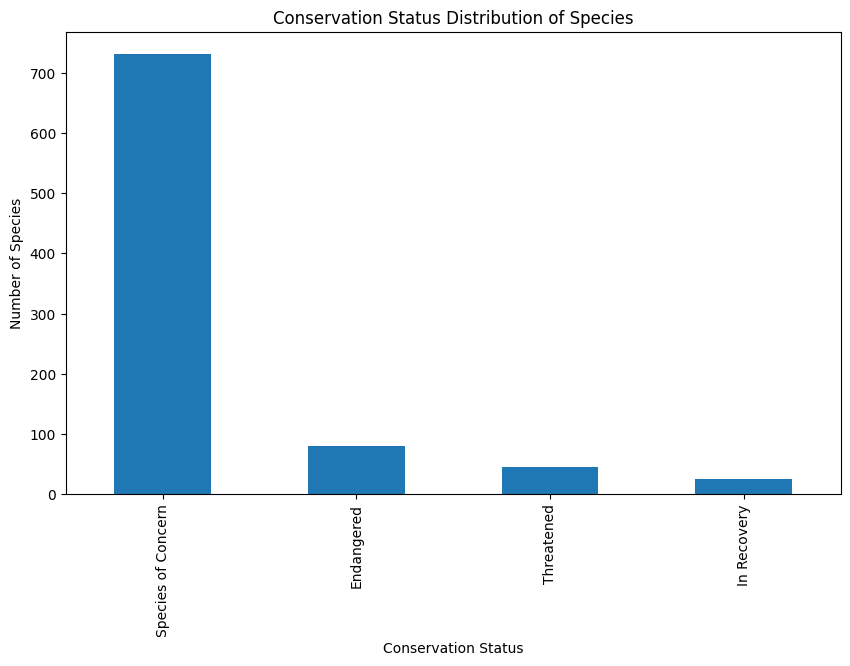

In [15]:
#To understand the distribution of conservation statuses, we can count the occurrences of each conservation status
# Count the occurrences of each conservation status
conservation_status_counts = merged_df['conservation_status'].value_counts().sort_values(ascending=False)

# Display the conservation status distribution
print("Conservation Status Distribution of Species Observed in National Parks:")
print(conservation_status_counts)

# Plotting the conservation status distribution
plt.figure(figsize=(10, 6))
conservation_status_counts.plot(kind='bar')
plt.title('Conservation Status Distribution of Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()


Percentage of Endangered Species in Each Category:
category
Mammal               3.666667
Fish                 2.290076
Amphibian            1.219512
Bird                 0.676819
Vascular Plant       0.020450
Nonvascular Plant         NaN
Reptile                   NaN
Name: count, dtype: float64


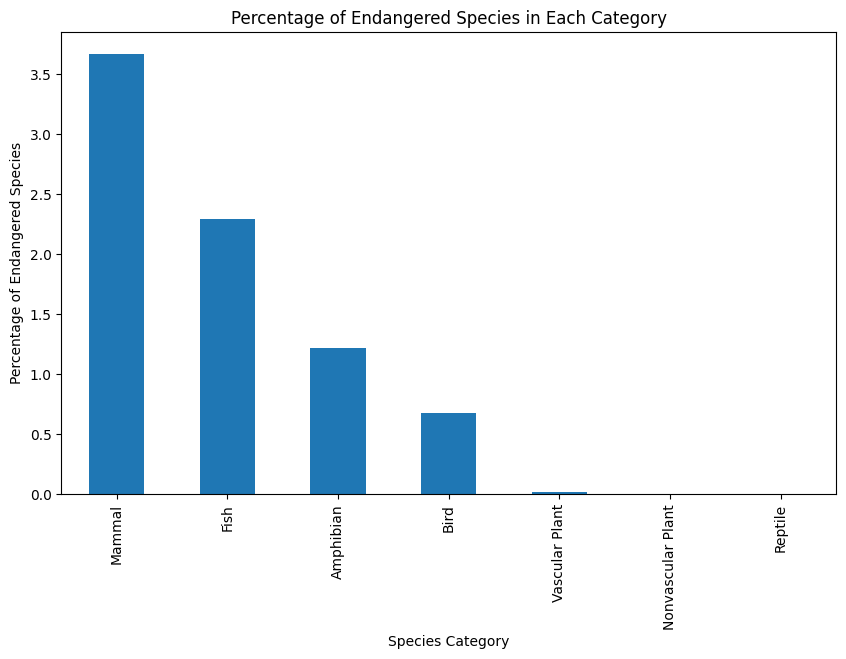

In [16]:
#To determine if certain categories are more likely to be endangered, we can calculate the percentage of endangered species within each category.
# Calculate the number of endangered species in each category
endangered_species = merged_df[merged_df['conservation_status'] == 'Endangered']
category_endangered_counts = endangered_species['category'].value_counts()

# Calculate the total number of species in each category
total_species_counts = merged_df['category'].value_counts()

# Calculate the percentage of endangered species in each category
percentage_endangered = (category_endangered_counts / total_species_counts * 100).sort_values(ascending=False)

# Display the percentage of endangered species in each category
print("Percentage of Endangered Species in Each Category:")
print(percentage_endangered)

# Plotting the percentage of endangered species in each category
plt.figure(figsize=(10, 6))
percentage_endangered.plot(kind='bar')
plt.title('Percentage of Endangered Species in Each Category')
plt.xlabel('Species Category')
plt.ylabel('Percentage of Endangered Species')
plt.show()


# Final Conclusion

## Biodiversity in National Parks: Insights and Implications

This analysis has provided a comprehensive view of the biodiversity within our national parks, focusing on species observations and their conservation statuses. By merging species data with park-specific information, we've uncovered valuable patterns and insights that can guide conservation efforts and highlight critical areas for attention.

### Key Findings

1. **Parks with the Highest Number of Species Observations**:
   - Our data shows that parks such as Yellowstone, Yosemite, and the Great Smoky Mountains have significantly higher numbers of species observations. These parks are vital biodiversity hotspots and should be prioritized for conservation efforts to protect their rich ecosystems.

2. **Categories of Species with the Most Observations**:
   - Mammals, birds, and plants are the most observed categories within the parks. This reflects either their higher presence or the focused monitoring efforts directed towards these groups, emphasizing their ecological importance.

3. **Conservation Status Distribution**:
   - While the majority of species do not currently require intervention, a substantial number are classified as 'Endangered' or 'Threatened'. This highlights ongoing risks and the need for continued conservation measures.

4. **Likelihood of Endangerment by Category**:
   - Categories such as reptiles and amphibians are more likely to include endangered species. This indicates a vulnerability within these groups that requires targeted conservation strategies to prevent further decline.

### Implications and Recommendations

- **Focused Conservation Efforts**: Parks with the highest number of endangered species should be prioritized. Special attention should be given to the most vulnerable categories identified in this analysis.
- **Increased Monitoring**: Enhancing monitoring efforts for species in lesser-observed categories can provide a more comprehensive understanding of biodiversity and uncover potential conservation needs.
- **Public Awareness and Education**: Raising public awareness about endangered species and their habitats can foster community support for conservation initiatives and increase engagement in biodiversity preservation.

### Future Work

- **Longitudinal Studies**: Conducting studies over time to track changes in species populations and conservation statuses will provide deeper insights into the effectiveness of conservation efforts.
- **Enhanced Data Collection**: Improving data collection methods and increasing the granularity of observations can enhance the accuracy and depth of future analyses.
- **Collaborative Efforts**: Encouraging collaboration between researchers, conservationists, and park authorities can lead to more holistic and effective conservation strategies.

### Closing Thoughts

This project underscores the importance of ongoing conservation efforts to protect the rich biodiversity within our national parks. By understanding and addressing the specific needs of vulnerable species, we can work towards preserving our natural heritage for future generations. The insights gained here can inform targeted conservation strategies, fostering a sustainable environment where both nature and humanity can thrive.

In conclusion, the health of our national parks is a reflection of the health of our planet. Let's continue to advocate for and implement robust conservation measures to ensure these natural treasures endure.
